# 📈 Moving Average Crossover Strategy

This notebook demonstrates a simple algorithmic trading strategy using a short-term and long-term moving average crossover.

In [39]:
# Step 1: Import Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# Step 2: Download Historical Stock Data
df = yf.download("NIFTYBEES.NS", start="2015-01-01", end="2025-06-01")
df = df['Close']
df.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_6044\3643162699.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("NIFTYBEES.NS", start="2015-01-01", end="2025-06-01")
[*********************100%***********************]  1 of 1 completed


Ticker,NIFTYBEES.NS
Date,
2015-01-01,83.814003
2015-01-02,84.713997
2015-01-05,84.492996
2015-01-06,82.388000
2015-01-07,81.995003


In [41]:
# Step 3: Calculate Moving Averages
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df.dropna(inplace=True)

In [42]:
# Step 4: Generate Buy/Sell Signals
df['Signal'] = 0
df.loc[df['MA10'] > df['MA50'], 'Signal'] = 1
df['Position'] = df['Signal'].diff()

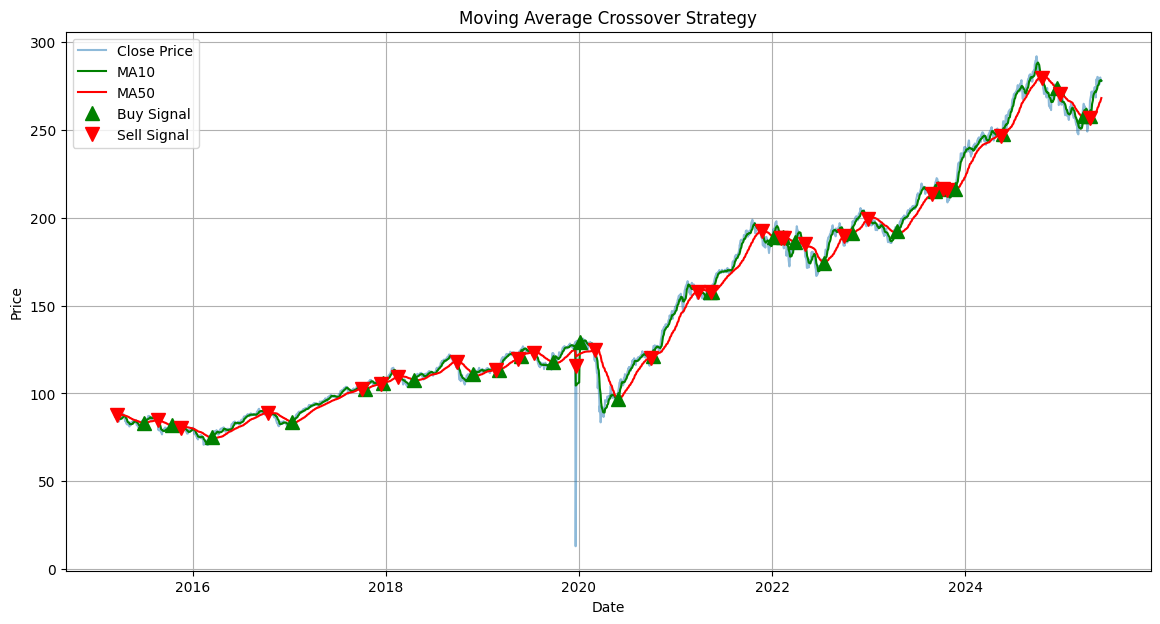

In [43]:
# Step 5: Visualize the Strategy
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['MA10'], label='MA10', color='green')
plt.plot(df['MA50'], label='MA50', color='red')
plt.plot(df[df['Position'] == 1].index, df['MA10'][df['Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(df[df['Position'] == -1].index, df['MA10'][df['Position'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# Step 6: Backtest the Strategy
df['Market Returns'] = df['Close'].pct_change()
df['Strategy Returns'] = df['Market Returns'] * df['Signal'].shift(1)

cumulative_strategy_return = (1 + df['Strategy Returns']).cumprod()[-1]
cumulative_market_return = (1 + df['Market Returns']).cumprod()[-1]

print(f"Cumulative Strategy Return: {round((cumulative_strategy_return - 1) * 100, 2)}%")
print(f"Cumulative Market Return: {round((cumulative_market_return - 1) * 100, 2)}%")

Cumulative Strategy Return: -69.38%
Cumulative Market Return: 220.32%


C:\Users\HP\AppData\Local\Temp\ipykernel_6044\116446133.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_strategy_return = (1 + df['Strategy Returns']).cumprod()[-1]
C:\Users\HP\AppData\Local\Temp\ipykernel_6044\116446133.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_market_return = (1 + df['Market Returns']).cumprod()[-1]
